In [1]:
# Note: to run program, run `jupyter notebook`

import numpy as np
from qiskit.visualization import array_to_latex
from IPython.display import display

# KET VECTORS
ket0 = np.array([[1], [0]])
ket1 = np.array([[0], [1]])
print(ket0 / 2 + ket1 / 2)
print("\n")

# MATRIX REPRESENTATIONS
M1 = np.array([[1, 1], [0, 0]])
M2 = np.array([[1, 0], [0, 1]])
M = M1 / 2 + M2 / 2
print(M)
print("\n")

# MATRIX MULTIPLICATION - NOW WITH BEAUTIFUL LATEX DISPLAY!
print("M1 × ket1:")
display(array_to_latex(np.matmul(M1, ket1)))

print("M1 × M2:")
display(array_to_latex(np.matmul(M1, M2)))

print("M × M:")
display(array_to_latex(np.matmul(M, M)))

[[0.5]
 [0.5]]


[[1.  0.5]
 [0.  0.5]]


M1 × ket1:


<IPython.core.display.Latex object>

M1 × M2:


<IPython.core.display.Latex object>

M × M:


<IPython.core.display.Latex object>

[0.70710678+0.j,0.70710678+0.j]

<IPython.core.display.Latex object>

\frac{\sqrt{2}}{2} |0\rangle+\frac{\sqrt{2}}{2} |1\rangle




True

False

<IPython.core.display.Latex object>

Measured: 1
Post-measurement state:


<IPython.core.display.Latex object>

Probability 0 1:


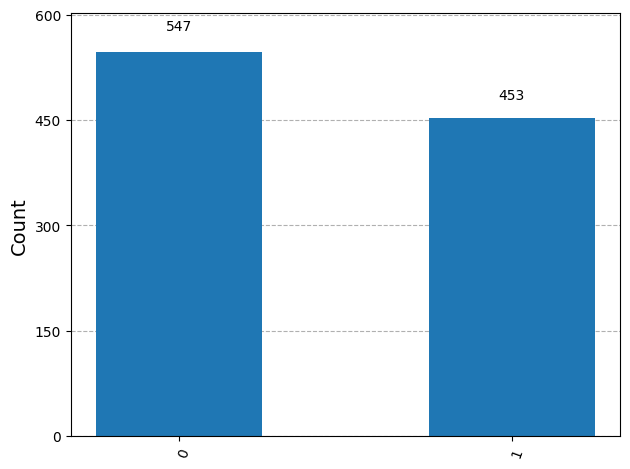

In [5]:
from qiskit.quantum_info import Statevector
from numpy import sqrt

# STATE VECTORS
u = Statevector([1 / sqrt(2), 1 / sqrt(2)])
v = Statevector([(1 + 2.0j) / 3, -2 / 3])
w = Statevector([1 / 3, 2 / 3])
print("\n")

# Demonstration of display methods
display(u.draw("text"))
display(u.draw("latex"))
print(u.draw("latex_source"))
print("\n")

# Determines if matrix is a valid quantum state vector - Euclidean norm is 1
display(u.is_valid())
display(w.is_valid())

# MEASUREMENTS
display(v.draw("latex"))

# This is a probabilistic-based output; will output different results upon reloading
outcome, state = v.measure()
print(f"Measured: {outcome}\nPost-measurement state:")
display(state.draw("latex"))

from qiskit.visualization import plot_histogram
import matplotlib

print("Probability 0 1:")
statistics = v.sample_counts(1000)
plot_histogram(statistics)

In [3]:
# OPERATORS
from qiskit.quantum_info import Operator
from qiskit.quantum_info import Statevector
from math import sqrt

# operators
Y = Operator([[0, -1.0j], [1.0j, 0]])
H = Operator([[1 / sqrt(2), 1 / sqrt(2)], [1 / sqrt(2), -1 / sqrt(2)]])
S = Operator([[1, 0], [0, 1.0j]])
T = Operator([[1, 0], [0, (1 + 1.0j) / sqrt(2)]])
 
display(T.draw("latex"))

v = Statevector([1, 0])

# use evolve to perform unitary operations
v = v.evolve(H)
v = v.evolve(T)
v = v.evolve(H)
v = v.evolve(S)
v = v.evolve(Y)
 
display(v.draw("latex"))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

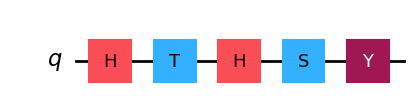

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

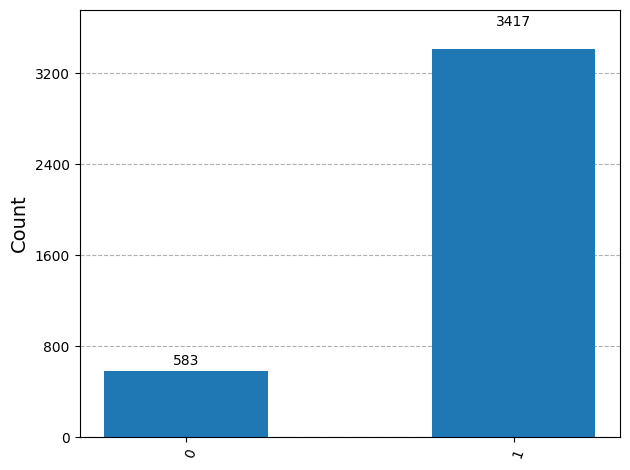

In [10]:
# CIRCUIT DEMO

from qiskit import QuantumCircuit
from qiskit.visualization import plot_histogram
 
circuit = QuantumCircuit(1)
 
circuit.h(0) # Hadamard
circuit.t(0) # T
circuit.h(0) # Hadamard
circuit.s(0) # S
circuit.y(0) # Pauli Y
 
display(circuit.draw(output="mpl")) # mpl for matplotlib

# Gets matrix corresponding with circuit
display(Operator.from_circuit(circuit).draw("latex"))

# Creates vector and evolves through circuit
ket0 = Statevector([1, 0])
v = ket0.evolve(circuit)
display(v.draw("latex"))

# Graph representation of statistical probability for states from circuit
statistics = v.sample_counts(4000)
display(plot_histogram(statistics))